## Theory

This post is based on the homework report that was written during the solar terrestrial physics class in 2022.

### Dipole Magnetic field

$$
\mathbf{B} = -\frac{\mu_0}{4\pi}\left( \frac{\mathbf{m}}{r^3} - \frac{3(\mathbf{m}\cdot\mathbf{r})\mathbf{r}}{r^5} \right)
$$

In $(r, \lambda, \phi)$ coordinates, we describe the magnetic field as follows:

$$
B_r = Z = -\frac{\mu_0 m}{2\pi}\frac{\sin\lambda}{r^3}
$$

$$
B_\lambda = H = \frac{\mu_0 m}{4\pi}\frac{\cos\lambda}{r^3}
$$

$$
B_\phi = 0
$$

Therefore, the magnetic field $\mathbf{B}$ does not depend on longitude $\phi$.

$$
\mathbf{B} = \mathbf{B}(r, \lambda)
$$

The strength $B$ is given by:

$$
B = \frac{\mu_0 m}{4\pi r^3}(1+3\sin^2\lambda)^{\textstyle \frac{1}{2}}
$$

For the Earth's magnetic field at the equator, denoted as $B_E$, it can be expressed as:

$$
B_E = \frac{\mu_0 m}{4\pi R_E^3}
$$

The actual value for $B_E$ is approximately $0.31$ Gauss (G).

The components of the magnetic field can be re-express in terms of $B_E$ as follows:

$$
B_r = -\frac{2B_E}{(r/R_E)^3}\sin\lambda
$$

$$
B_\lambda = \frac{B_E}{(r/R_E)^3}\cos\lambda
$$

$$
B_\phi = 0
$$

The magnetic field line in the meridian (when $\phi=\text{const}$ or in the $(r,\lambda)$-plane) is given by:

$$
r = r_\text{eq} \cos^2\lambda
$$

Here, $r_\text{eq} = LR_E$ and $L$ is called L-parameter.

>L-parameter describes the set of magnetic field lines which cross the Earth's magnetic equator at a number of Earth-radii equal to the L-parameter.
>For example, $L=2$ describes the set of the Earth's magnetic field lines which cross the Earth's magnetic equator two earth radii from the center of the Earth.[^1]

[^1]: <https://en.wikipedia.org/wiki/L-shell>

>The dipole model of the Earth's magnetic field is a first order approximation of the rather complex true Earth's magnetic field. Due to effects of the interplanetary magnetic field (IMF), and the solar wind, the dipole model is particularly inaccurate at high L-shells (e.g., above L=3), but may be a good approximation for lower L-shells. For more precise work, or for any work at higher L-shells, a more accurate model that incorporates solar effects, such as the Tsyganenko magnetic field model, is recommended.[^2]

[^2]:<https://en.wikipedia.org/wiki/Dipole_model_of_the_Earth%27s_magnetic_field>

$$
\begin{align*}
\mathbf{B}(\mathbf{r}) & = B_r(r, \lambda) \hat{r} + B_\lambda (r, \lambda) \hat{\lambda} \\
& = B_x(x, y)\hat{x} + B_y(x, y)\hat{y}
\end{align*}
$$

### Newton's equation of motion for a charged particle in magnetic field

$$
\frac{d^2\mathbf{r}}{dt^2} = \frac{q}{m}\mathbf{v}\times\mathbf{B}
$$

$$
\frac{d^2x}{dt^2}\hat{x} + \frac{d^2y}{dt^2}\hat{y} + \frac{d^2z}{dt^2}\hat{z} = \frac{q}{m}(\hat{x}(v_yB_z - v_zB_y) + \hat{y}(v_zB_x - v_xB_z) + \hat{z}(v_xB_y - v_yB_x))
$$

$$
\frac{d^2x}{dt^2} = \frac{q}{m}(v_yB_z - v_zB_y)
$$

$$
\frac{d^2y}{dt^2} = \frac{q}{m}(v_zB_x - v_xB_z)
$$

$$
\frac{d^2z}{dt^2} = \frac{q}{m}(v_xB_y - v_yB_x)
$$

### The coupled 1st ODEs

$$
\frac{dx}{dt} = v_x
$$

$$
\frac{dy}{dt} = v_y
$$

$$
\frac{dz}{dt} = v_z
$$

$$
\frac{dv_x}{dt} = \frac{q}{m}(v_yB_z - v_zB_y)
$$

$$
\frac{dv_y}{dt} = \frac{q}{m}(v_zB_x - v_xB_z)
$$

$$
\frac{dv_z}{dt} = \frac{q}{m}(v_xB_y - v_yB_x)
$$

### The state vector for `odeint`

$$
S = (x, y, z, v_x, v_y, v_z)
$$

$$
\frac{dS}{dt} = (\frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt}, \frac{dv_x}{dt}, \frac{dv_y}{dt},\frac{dv_z}{dt})
$$

## Code

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

In [ ]:
# Be = 0.31 G = 0.31 * 10^-4 T
Be = 0.31 * 1e-4
# Re = 6371 km = 6371 * 10^3 m
Re = 6371 * 1e3
C = Be * (Re**3)


def B(x, y, z):
    """dipole field at (x, y, z)"""
    r = np.sqrt(x**2 + y**2 + z**2)
    Bx = -1 * C * (3 * x * z) / (r**5)
    By = -1 * C * (3 * y * z) / (r**5)
    Bz = C * (r**2 - 3 * z**2) / (r**5)
    return Bx, By, Bz


def field_line_3D(phi, L=6.6):
    """dipole field line (3D)"""
    phi = np.deg2rad(phi)
    theta = np.linspace(0, 2 * np.pi, 1000)
    rf = L * np.sin(theta) ** 2
    xf = rf * np.sin(theta) * np.cos(phi)
    yf = rf * np.sin(theta) * np.sin(phi)
    zf = rf * np.cos(theta)
    return xf, yf, zf


def field_line_2D(L=6.6):
    """dipole field line (2D)"""
    lamb = np.linspace(0, 2 * np.pi, 1000)
    rf2 = L * np.cos(lamb) ** 2
    xf2 = rf2 * np.cos(lamb)
    zf2 = rf2 * np.sin(lamb)
    return xf2, zf2


def dSdt(S, t, q_over_m):
    """dS/dt for odeint"""
    x, y, z, vx, vy, vz = S
    Bx, By, Bz = B(x, y, z)
    dvxdt = q_over_m * (vy * Bz - vz * By)
    dvydt = q_over_m * (vz * Bx - vx * Bz)
    dvzdt = q_over_m * (vx * By - vy * Bx)
    return [vx, vy, vz, dvxdt, dvydt, dvzdt]

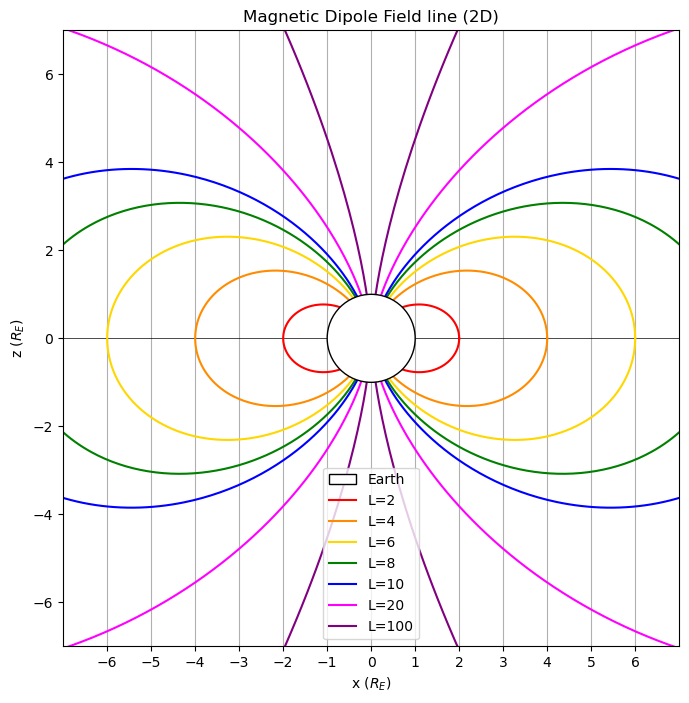

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
xmin, xmax = -7, 7
ymin, ymax = -7, 7

ax.add_patch(
    plt.Circle(
        (0, 0), 1, zorder=99, facecolor="white", edgecolor="black", label="Earth"
    )
)
ax.set_aspect("equal")
ax.legend()
ax.axhline(y=0, color="black", linewidth=0.5)
ax.xaxis.grid(True, which="both")
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
majors = np.arange(xmin + 1, xmax, 1)
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
ax.set_xlabel("x ($R_E$)")
ax.set_ylabel("z ($R_E$)")

Lvalues = [2, 4, 6, 8, 10, 20, 100]
colors = ["r", "darkorange", "gold", "green", "blue", "magenta", "purple"]
lamb = np.linspace(0, 2 * np.pi, 1000)
for i, L in enumerate(Lvalues):
    x, z = field_line_2D(L)
    ax.plot(x, z, label=f"L={L}", color=colors[i])

ax.legend()
ax.set_title("Magnetic Dipole Field line (2D)")
plt.show()

In [ ]:
species = "Proton"

e = 1.602e-19
q = e  # C

mH = 1.67e-27
m = mH  # kg
q_over_m = q / m

E_keV = 2000  # keV

In [ ]:
# L-parameter
L = 6.6

# start at equator
x0, y0, z0 = L * Re, 0, 0

keV_to_J = 1e3 * e  # J

# particle energy (keV) and pitch angle
E = E_keV * keV_to_J  # J
pitch_angle_deg = 30
alpha = np.deg2rad(pitch_angle_deg)

# particle velocity
v0 = np.sqrt(2 * E / m)

# vx = v_perp
# vy = 0
# vz = v_para
vx0 = v0 * np.sin(alpha)
vy0 = 0
vz0 = v0 * np.cos(alpha)

# bounce time_scale
t_B = 290 * (np.pi * L / 10) * np.sqrt(m / (mH * E_keV))
print(f"bounce time scale ~ {t_B} s")

S0 = [x0, y0, z0, vx0, vy0, vz0]

# number of bounce
n = 3

tmin = 0
tmax = n * t_B

t = np.linspace(tmin, tmax, 1000)

# solve ODE
sol = odeint(dSdt, S0, t, args=(q_over_m,))
x, y, z, vx, vy, vz = sol.T
x, y, z = x / Re, y / Re, z / Re

print(f"t_max ~ {tmax:.4f} s")

bounce time scale ~ 13.44549539521195 s
t_max ~ 40.3365 s


In [ ]:
trajectory_linewidth = 0.8
fieldline_linewidth = 0.5

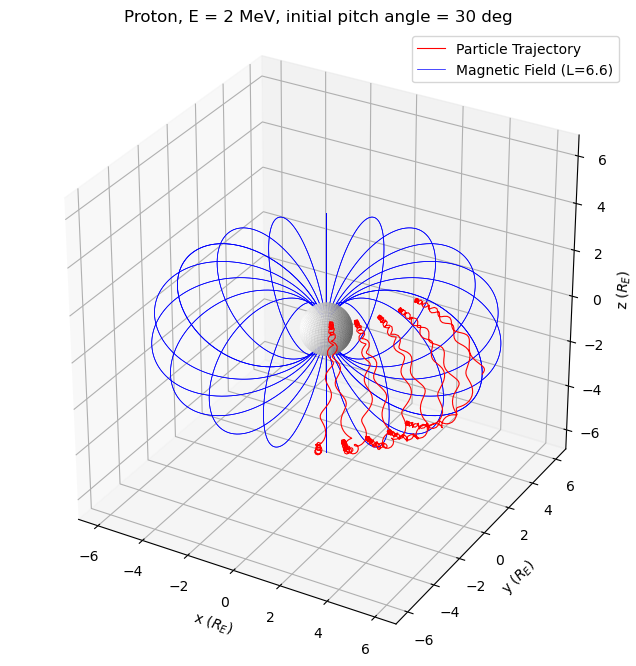

In [ ]:
# xyzrange = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
ax.set_aspect("equal")
# ax.plot([-xyzrange,xyzrange], [0,0], [0, 0], color='black')
# ax.plot([0,0], [-xyzrange,xyzrange], [0, 0], color='black')
# ax.plot([0,0], [0,0], [-xyzrange, xyzrange], color='black')
ax.plot(
    x,
    y,
    z,
    color="red",
    label="Particle Trajectory",
    linewidth=trajectory_linewidth,
    zorder=200,
)
ax.set_xlabel("x ($R_E$)")
ax.set_ylabel("y ($R_E$)")
ax.set_zlabel("z ($R_E$)")
ax.set_xlim(-L, L)
ax.set_ylim(-L, L)
ax.set_zlim(-L, L)
for az in np.arange(0, 361, 20):
    xf, yf, zf = field_line_3D(az, L)
    if az == 360:
        ax.plot(
            xf,
            yf,
            zf,
            color="blue",
            linewidth=fieldline_linewidth,
            zorder=-1,
            label=f"Magnetic Field (L={L})",
        )
    else:
        ax.plot(xf, yf, zf, color="blue", linewidth=fieldline_linewidth, zorder=-1)

# Sphere with radius Re
u = np.linspace(0, 2 * np.pi, 1000)
v = np.linspace(0, np.pi, 1000)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.set_title(
    f"{species}, E = {E_keV/1000:.0f} MeV, initial pitch angle = {pitch_angle_deg} deg"
)
ax.plot_surface(xs, ys, zs, color="white", alpha=1)
ax.legend()
plt.show()

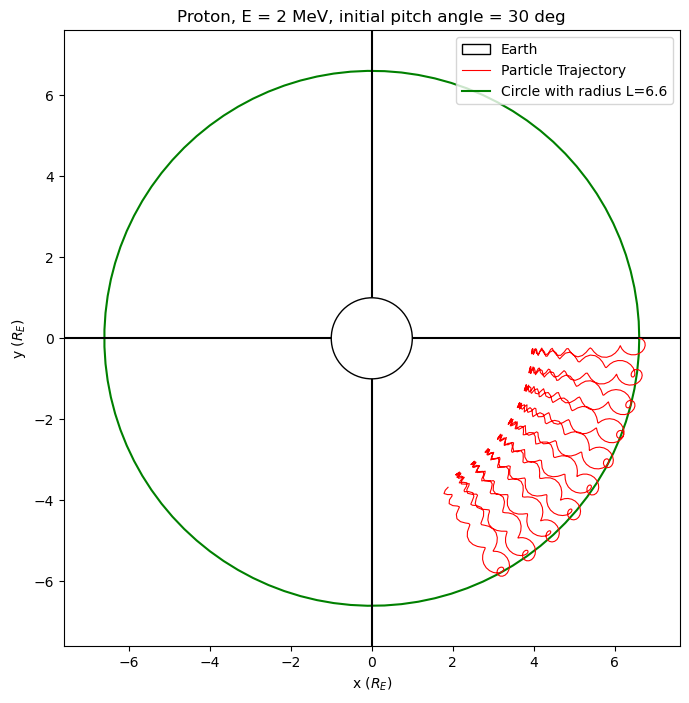

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.set_aspect("equal")
ax.add_patch(
    plt.Circle(
        (0, 0), 1, zorder=99, facecolor="white", edgecolor="black", label="Earth"
    )
)
ax.plot([-10, 10], [0, 0], color="black")
ax.plot([0, 0], [-10, 10], color="black")
ax.plot(
    x,
    y,
    color="red",
    label="Particle Trajectory",
    linewidth=trajectory_linewidth,
    zorder=200,
)
ax.set_xlabel("x ($R_E$)")
ax.set_ylabel("y ($R_E$)")
ax.set_xlim(-L - 1, L + 1)
ax.set_ylim(-L - 1, L + 1)
theta = np.linspace(0, 2 * np.pi, 100)
rc = L
xc = rc * np.cos(theta)
yc = rc * np.sin(theta)
plt.plot(xc, yc, color="green", zorder=-1, label=f"Circle with radius L={L}")
ax.set_title(
    f"{species}, E = {E_keV/1000:.0f} MeV, initial pitch angle = {pitch_angle_deg} deg"
)
ax.legend(loc=1)
plt.show()

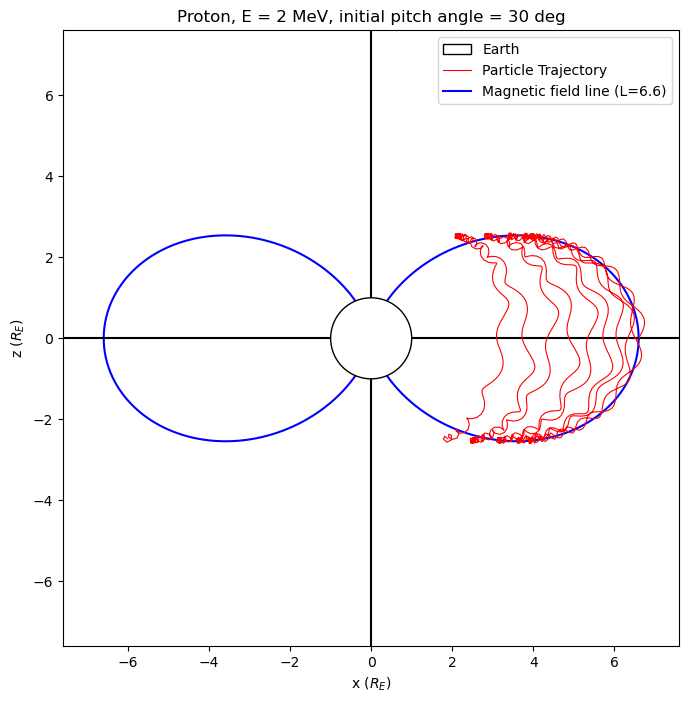

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.add_patch(
    plt.Circle(
        (0, 0), 1, zorder=99, facecolor="white", edgecolor="black", label="Earth"
    )
)
ax.set_aspect("equal")
ax.plot([-10, 10], [0, 0], color="black")
ax.plot([0, 0], [-10, 10], color="black")
ax.plot(
    x,
    z,
    color="red",
    label="Particle Trajectory",
    linewidth=trajectory_linewidth,
    zorder=200,
)
ax.set_xlabel("x ($R_E$)")
ax.set_ylabel("z ($R_E$)")
ax.set_xlim(-L - 1, L + 1)
ax.set_ylim(-L - 1, L + 1)

xf2, zf2 = field_line_2D(L)
ax.plot(xf2, zf2, zorder=-1, color="blue", label=f"Magnetic field line (L={L})")
ax.set_title(
    f"{species}, E = {E_keV/1000:.0f} MeV, initial pitch angle = {pitch_angle_deg} deg"
)
ax.legend()
plt.show()

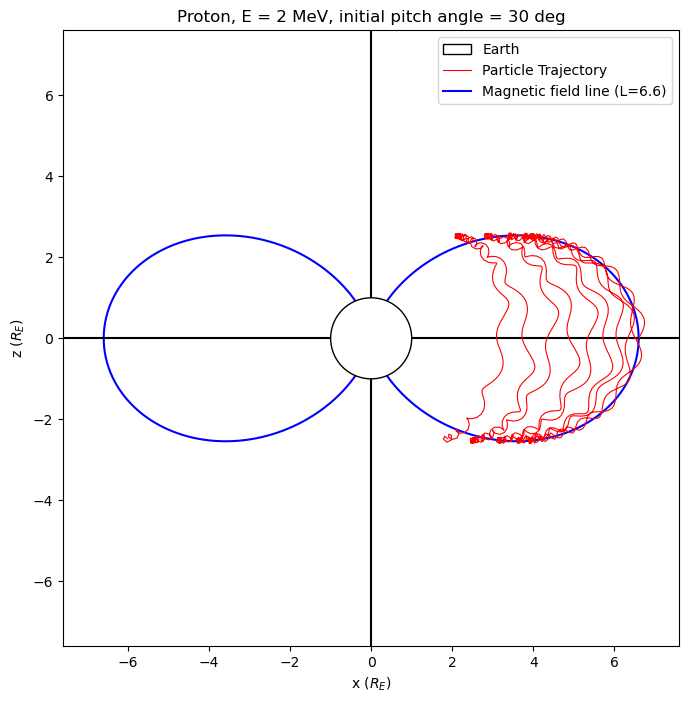

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.add_patch(
    plt.Circle(
        (0, 0), 1, zorder=99, facecolor="white", edgecolor="black", label="Earth"
    )
)
ax.set_aspect("equal")
ax.plot([-10, 10], [0, 0], color="black")
ax.plot([0, 0], [-10, 10], color="black")
ax.plot(
    x,
    z,
    color="red",
    label="Particle Trajectory",
    linewidth=trajectory_linewidth,
    zorder=200,
)
ax.set_xlabel("x ($R_E$)")
ax.set_ylabel("z ($R_E$)")
ax.set_xlim(-L - 1, L + 1)
ax.set_ylim(-L - 1, L + 1)

xf2, zf2 = field_line_2D(L)
ax.plot(xf2, zf2, zorder=-1, color="blue", label=f"Magnetic field line (L={L})")
ax.set_title(
    f"{species}, E = {E_keV/1000:.0f} MeV, initial pitch angle = {pitch_angle_deg} deg"
)
ax.legend()
plt.show()

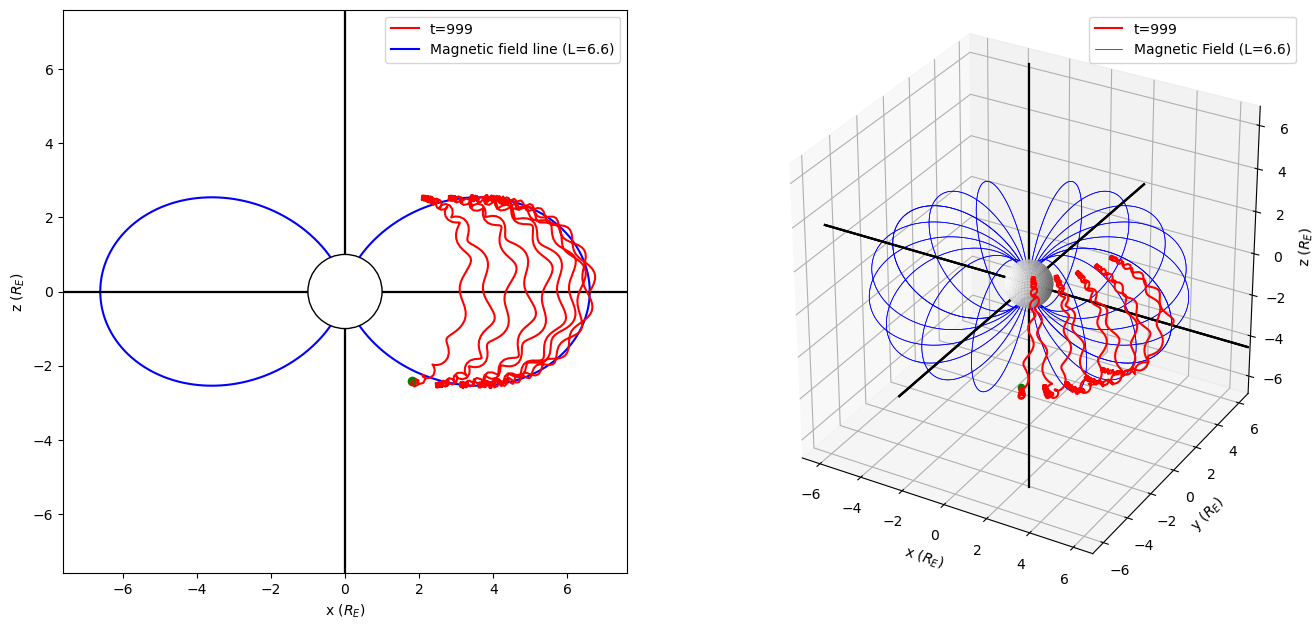

In [ ]:
#| output: false
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection="3d")

xdata = x
ydata = y
zdata = z

sc1 = ax1.scatter([], [], color="green")
(ln1,) = ax1.plot([], [], "r-", zorder=99)
sc2 = ax2.scatter([], [], [], color="green")
(ln2,) = ax2.plot([], [], [], "r-", zorder=99)

# Field line (2D)
xf2, zf2 = field_line_2D(L)
ax1.plot(xf2, zf2, zorder=-1, color="blue", label=f"Magnetic field line (L={L})")

# Earth (2D)
ax1.add_patch(plt.Circle((0, 0), 1, zorder=99, facecolor="white", edgecolor="black"))

# Field line (3D)
for az in np.arange(0, 361, 20):
    xf, yf, zf = field_line_3D(az, L)
    if az == 360:
        ax2.plot(
            xf,
            yf,
            zf,
            color="blue",
            linewidth=fieldline_linewidth,
            zorder=-1,
            label=f"Magnetic Field (L={L})",
        )
    else:
        ax2.plot(xf, yf, zf, color="blue", linewidth=fieldline_linewidth, zorder=-1)

# Earth (3D)
u = np.linspace(0, 2 * np.pi, 1000)
v = np.linspace(0, np.pi, 1000)
xs = 1 * np.outer(np.cos(u), np.sin(v))
ys = 1 * np.outer(np.sin(u), np.sin(v))
zs = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
ax2.plot_surface(xs, ys, zs, color="white", alpha=1)


def init():
    ax1.set_aspect("equal")
    ax1.plot([-10, 10], [0, 0], color="black")
    ax1.plot([0, 0], [-10, 10], color="black")
    ax1.set_xlabel("x ($R_E$)")
    ax1.set_ylabel("z ($R_E$)")
    ax1.set_xlim(-L - 1, L + 1)
    ax1.set_ylim(-L - 1, L + 1)

    ax2.set_aspect("equal")
    ax2.plot([-10, 10], [0, 0], [0, 0], color="black")
    ax2.plot([0, 0], [-10, 10], [0, 0], color="black")
    ax2.plot([0, 0], [0, 0], [-10, 10], color="black")
    ax2.set_xlabel("x ($R_E$)")
    ax2.set_ylabel("y ($R_E$)")
    ax2.set_zlabel("z ($R_E$)")
    ax2.set_xlim(-L, L)
    ax2.set_ylim(-L, L)
    ax2.set_zlim(-L, L)

    return ln1, ln2


def update(frame):
    sc1.set_offsets([xdata[frame - 1], zdata[frame - 1]])
    ln1.set_data(xdata[:frame], zdata[:frame])
    ln1.set_label(f"t={frame}")
    ax1.legend()

    sc2._offsets3d = ([xdata[frame - 1]], [ydata[frame - 1]], [zdata[frame - 1]])
    ln2.set_data(xdata[:frame], ydata[:frame])
    ln2.set_3d_properties(zdata[:frame])
    ln2.set_label(f"t={frame}")
    ax2.legend()
    return ln1, ln2


ani = FuncAnimation(
    fig, update, frames=np.arange(1, len(xdata)), init_func=init, blit=True
)

ani.save("simulation.gif", fps=30)

![](simulation.gif)

In [ ]:
ani.save("simulation.mp4", fps=30)

{{< video https://www.youtube.com/watch?v=vDx80CQcwec >}}